In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Practical Deep Learning/Lesson 5: Logistic Regression/train.csv')

In [7]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_val = data_dev[0]
X_val = data_dev[1:n].T

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n].T
m_train, _ = X_train.shape

In [5]:
def extract_data(X, y, classes):
    """
    X: numpy array, matrix of size (N, d), d is data dim
    y: numpy array, size (N, )
    cls: two lists of labels. For example:
        cls = [[1, 4, 7], [5, 6, 8]]
    return:
        X: extracted data
        y: extracted label
            (0 and 1, corresponding to two lists in cls)
    """
    y_res_id = np.array([])
    for i in classes[0]:
        y_res_id = np.hstack((y_res_id, np.where(y == i)[0]))
    n0 = len(y_res_id)

    for i in classes[1]:
        y_res_id = np.hstack((y_res_id, np.where(y == i)[0]))
    n1 = len(y_res_id) - n0

    y_res_id = y_res_id.astype(int)
    X_res = X[y_res_id, :]/255.0
    y_res = np.asarray([0]*n0 + [1]*n1)
    return (X_res, y_res)

In [8]:
classes = [[0], [1]]
# extract data for training
(X_train, Y_train) = extract_data(X_train, Y_train, classes)

# extract data for test
(X_val, Y_val) = extract_data(X_val, Y_val, classes)

In [10]:
def pad(x):
    return np.hstack((np.ones((x.shape[0], 1), dtype = x.dtype), x))

In [11]:
print(pad(X_train))

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


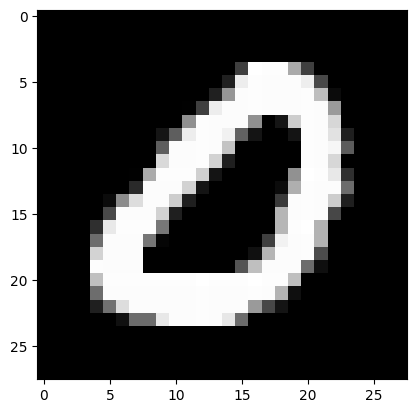

In [ ]:
# Sample data
sample_image = X_train[0, :].reshape((28, 28))

plt.gray()
plt.imshow(sample_image, interpolation='nearest')
plt.show()

In [83]:
def pad(x):
    return np.hstack((np.ones((x.shape[0], 1), dtype = x.dtype), x))

# Sigmoid function
def sigmoid(z):
    "YOUR CODE HERE"
    return 1 / (1 + np.exp(-z))

# Logistic regression model
def logistic_regression(X, y, lr=0.1, num_iter=10000):
    weights = np.zeros(X.shape[1])
    "YOUR CODE HERE"
    for i in range(num_iter):
      gradient = np.dot(X.T,(predict(X, weights, threshold=0.5) - y)) / (len(y))
      weights -= lr * gradient
    return weights

# Predict function
def predict(X, weights, threshold=0.5):
    "YOUR CODE HERE"
    # You should use this function to predict a image
    return sigmoid(np.dot(X, weights))

def make_predictions(X, weights, threshold=0.5):
    "YOUR CODE HERE"
    # You should use this function to predict n image
    pre = sigmoid(np.dot(pad(X), weights))
    return np.round(pre).astype(int)

def get_accuracy(predictions, Y):
    "YOUR CODE HERE"
    return np.mean(predictions == Y)

In [50]:
weights = logistic_regression(pad(X_train), Y_train)

In [29]:
print(weights)

[ 5.13340560e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.30957445e-04
 -7.36810975e-03 -2.21030796e-02 -1.05667422e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.03800320e-06 -2.77172

In [35]:
def test_prediction(index, weights):
    #Lấy mẫu dữ liệu từ X_train tại chỉ số index. Sử dụng None để thêm một chiều mới, biến current_image thành mảng 2D với kích thước (1, số_lượng_đặc_trưng)
    current_image = X_train[None, index, :]
    "YOUR CODE HERE"
    #Làm tròn giá trị dự đoán
    prediction = np.round(predict(pad(current_image), weights, threshold=0.5)).astype(int)
    label = Y_train[index]

    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [0.]
Label:  0


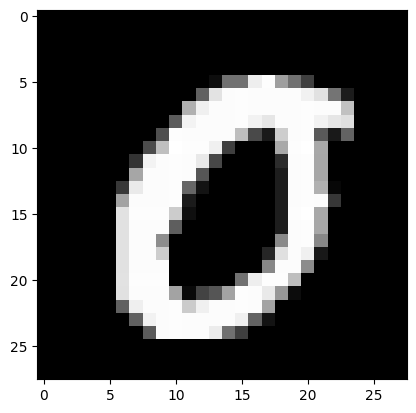

Prediction:  [1.]
Label:  1


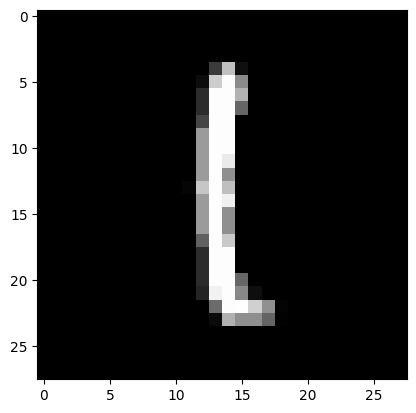

In [93]:
test_prediction(0, weights)
test_prediction(6000, weights)

Finally, let's find the accuracy on the dev set:

In [64]:
weights = logistic_regression(pad(X_val), Y_val)

In [91]:
dev_predictions = make_predictions(X_val, weights)
print(dev_predictions)
print(Y_val)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [92]:
get_accuracy(dev_predictions, Y_val)

1.0